In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from itertools import product

In [ ]:
# Question 1

houses = pd.read_csv('/content/Real estate.csv')
houses.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [14]:
# Question 2
houses.columns

houses.rename(columns = {'X1 transaction date': 'date',
                         'X2 house age': 'age',
                         'X3 distance to the nearest MRT station': 'dist_to_closest_MRT',
                         'X4 number of convenience stores': 'num_conv_stores',
                         'X5 latitude': 'lat',
                         'X6 longitude': 'long',
                         'Y house price of unit area': 'price_per_unit_area'
                         }, inplace = True)
houses.rename(columns = {'price_per_unit_area': 'price'}, inplace = True)
houses.columns

Index(['No', 'date', 'age', 'dist_to_closest_MRT', 'num_conv_stores', 'lat',
       'long', 'price'],
      dtype='object')

In [ ]:
# Question 3
houses.describe()

,No,date,age,dist_to_closest_MRT,num_conv_stores,lat,long,price_per_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


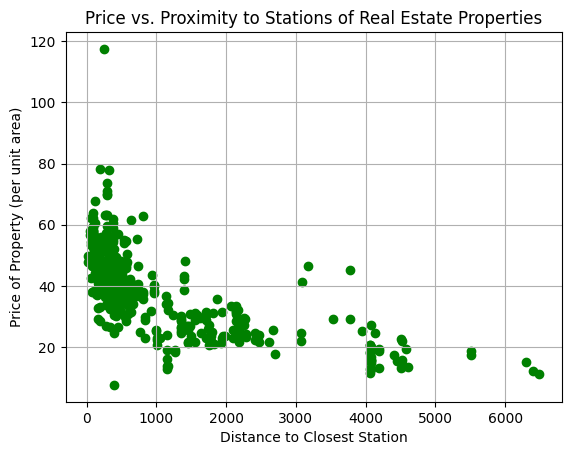

In [21]:
# Question 4

plt.scatter(houses['dist_to_closest_MRT'], houses['price'], c = 'g')

plt.xlabel('Distance to Closest Station')
plt.ylabel('Price of Property (per unit area)')
plt.title('Price vs. Proximity to Stations of Real Estate Properties')

plt.grid()
plt.show()

# I put distance on the x-axis and price on the y-axis, because we are measuring how the distance to the closest station (independent variable) can affect the price/value (dependent variable) of the property.
# The scatter plot below shows us that as the distance to the closest station gets larger, the price of the property gets lower.
# The overall trend of the data appears to be reverse exponential (i.e., when properties are ~1500 units or less away from the closest station, price increases at a faster rate).
# Given this trend, it may be hard to use linear regression to calculate a reliable correlation coefficent.

In [23]:
# Question 5

house_price_reg = ols('price ~ dist_to_closest_MRT', data = houses).fit()
print(house_price_reg.summary())

# The coefficient of this regression model is -0.0073. This means that as the distance to closest station increases by 1 unit, the price will decrease by 0.0073 units.
# However, as I stated in the previous code chunk, this coefficient is NOT a good representation of the relationship found in the above scatter plot.
# This is because the coefficient (combined with the intercept) plots us a linear relationship between the two variables, but the scatter plot maps an exponential relationship.
# In other words, the change in price is dependent on WHERE the change in distance is. If it's an increase from 4000 to 4500 units, the decrease in price will be a lot less than a change from 500 to 1000 units, despite the magnitude of the change being the same.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     342.2
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           4.64e-56
Time:                        19:03:18   Log-Likelihood:                -1542.5
No. Observations:                 414   AIC:                             3089.
Df Residuals:                     412   BIC:                             3097.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              45.8514    

In [27]:
# Question 6

dist_age_reg = ols('price ~ dist_to_closest_MRT + age', data = houses).fit()
print(dist_age_reg.summary())

# The coefficient of the distance to closest station is the same as above, and the coefficient of the age of the house on house price is -0.2310.
# This means that, assuming distance to the closest station is held constant, that price decreases by 0.2310 per unit area for every 1 unit increase in age of the house.
# The same goes for the distance coefficient (age is held constant).
# The coefficient of age being higher than that of distance means that age has a LARGER impact on price than distance, assuming the other variable is controlled for.
# In other words, a 1 unit increase of age will decrease price MORE than a 1 unit increase of distance.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     198.3
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           5.07e-61
Time:                        19:17:00   Log-Likelihood:                -1527.9
No. Observations:                 414   AIC:                             3062.
Df Residuals:                     411   BIC:                             3074.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              49.8856    